# Exploratory Data Analysis

In [1]:
# load library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import zipfile
import urllib.request
import io

In [2]:
# load raw and processed data
url = "https://github.com/zxyao5148/STAT3612_2023_1A_GroupProject/raw/main/raw_data/ehr_preprocessed_seq_by_day_cat_embedding.pkl.zip"
with urllib.request.urlopen(url) as response:
    with zipfile.ZipFile(io.BytesIO(response.read())) as zip_file:
        with zip_file.open("ehr_preprocessed_seq_by_day_cat_embedding.pkl", "r") as file:
            EHR = pd.read_pickle(file)
train_merged_df_latest = pd.read_csv('https://github.com/zxyao5148/STAT3612_2023_1A_GroupProject/raw/main/data_processing/train_merged_latest_feat.csv')
train_merged_df_median = pd.read_csv('https://github.com/zxyao5148/STAT3612_2023_1A_GroupProject/raw/main/data_processing/train_merged_median_feat.csv')
valid_merged_df_latest = pd.read_csv('https://github.com/zxyao5148/STAT3612_2023_1A_GroupProject/raw/main/data_processing/valid_merged_latest_feat.csv')
valid_merged_df_median = pd.read_csv('https://github.com/zxyao5148/STAT3612_2023_1A_GroupProject/raw/main/data_processing/valid_merged_median_feat.csv')
test_merged_df_latest = pd.read_csv('https://github.com/zxyao5148/STAT3612_2023_1A_GroupProject/raw/main/data_processing/test_merged_latest_feat.csv')
test_merged_df_median = pd.read_csv('https://github.com/zxyao5148/STAT3612_2023_1A_GroupProject/raw/main/data_processing/test_merged_median_feat.csv')

In [3]:
# summary statistics
train_merged_df_latest.describe()
#train_merged_df_median.describe()

,subject_id,hadm_id,StudyTime,readmitted_within_30days,LoS,prev_admits,age,gender,ethnicity,Y90-Y99,...,CARDIAC DRUGS,PRE-NATAL VITAMINS,ANESTHETICS,ANTIBIOTICS,ANTIHYPERGLYCEMICS,SEDATIVE/HYPNOTICS,ANTIDOTES,AUTONOMIC DRUGS,VITAMINS,BIOLOGICALS
count,9.271000e+03,9.271000e+03,9271.000000,9271.000000,9.271000e+03,9.271000e+03,9.271000e+03,9271.000000,9271.000000,9271.000000,...,9.271000e+03,9.271000e+03,9.271000e+03,9.271000e+03,9.271000e+03,9.271000e+03,9.271000e+03,9.271000e+03,9.271000e+03,9.271000e+03
mean,1.498988e+07,2.498949e+07,106577.150976,0.174738,-1.149622e-17,9.196972e-18,1.808738e-16,0.550426,5.059648,0.001510,...,3.832072e-19,8.047351e-17,3.238101e-17,1.264584e-17,4.445203e-17,4.291920e-17,3.151879e-17,3.563827e-17,8.277275e-17,1.019331e-16
std,2.857901e+06,2.907531e+06,51252.164430,0.379764,1.000054e+00,1.000054e+00,1.000054e+00,0.497478,1.606621,0.038833,...,1.000054e+00,1.000054e+00,1.000054e+00,1.000054e+00,1.000054e+00,1.000054e+00,1.000054e+00,1.000054e+00,1.000054e+00,1.000054e+00
min,1.000188e+07,2.000130e+07,11.296000,0.000000,-6.221857e-01,-4.096093e-01,-2.988328e+00,0.000000,0.000000,0.000000,...,-3.797126e-01,-1.393526e-02,-4.552732e-01,-7.680755e-01,-3.184582e-01,-4.183569e-01,-4.770716e-02,-3.069704e-01,-3.815949e-01,-3.049944e-01
25%,1.256972e+07,2.248093e+07,73346.140000,0.000000,-4.054735e-01,-4.096093e-01,-5.765057e-01,0.000000,5.000000,0.000000,...,-3.797126e-01,-1.393526e-02,-4.552732e-01,-6.086837e-01,-3.184582e-01,-4.183569e-01,-4.770716e-02,-3.069704e-01,-3.815949e-01,-3.049944e-01
50%,1.500039e+07,2.503213e+07,102533.515000,0.000000,-1.887612e-01,-4.096093e-01,1.037520e-01,1.000000,6.000000,0.000000,...,-3.797126e-01,-1.393526e-02,-4.552732e-01,-2.899001e-01,-3.184582e-01,-4.183569e-01,-4.770716e-02,-3.069704e-01,-3.815949e-01,-3.049944e-01
75%,1.745238e+07,2.751795e+07,142633.218000,0.000000,1.363071e-01,-4.096093e-01,7.840096e-01,1.000000,6.000000,0.000000,...,8.618410e-02,-1.393526e-02,2.103691e-01,1.882752e-01,-1.456805e-01,-6.388909e-02,-4.770716e-02,-3.069704e-01,-3.815949e-01,-3.049944e-01
max,1.999884e+07,2.999960e+07,235940.984000,1.000000,6.379553e+01,9.583779e+00,1.959000e+00,1.000000,6.000000,1.000000,...,1.685846e+01,8.611527e+01,3.082991e+01,2.425643e+01,3.942042e+01,3.112928e+01,4.418160e+01,1.464970e+01,1.715923e+01,1.835905e+01


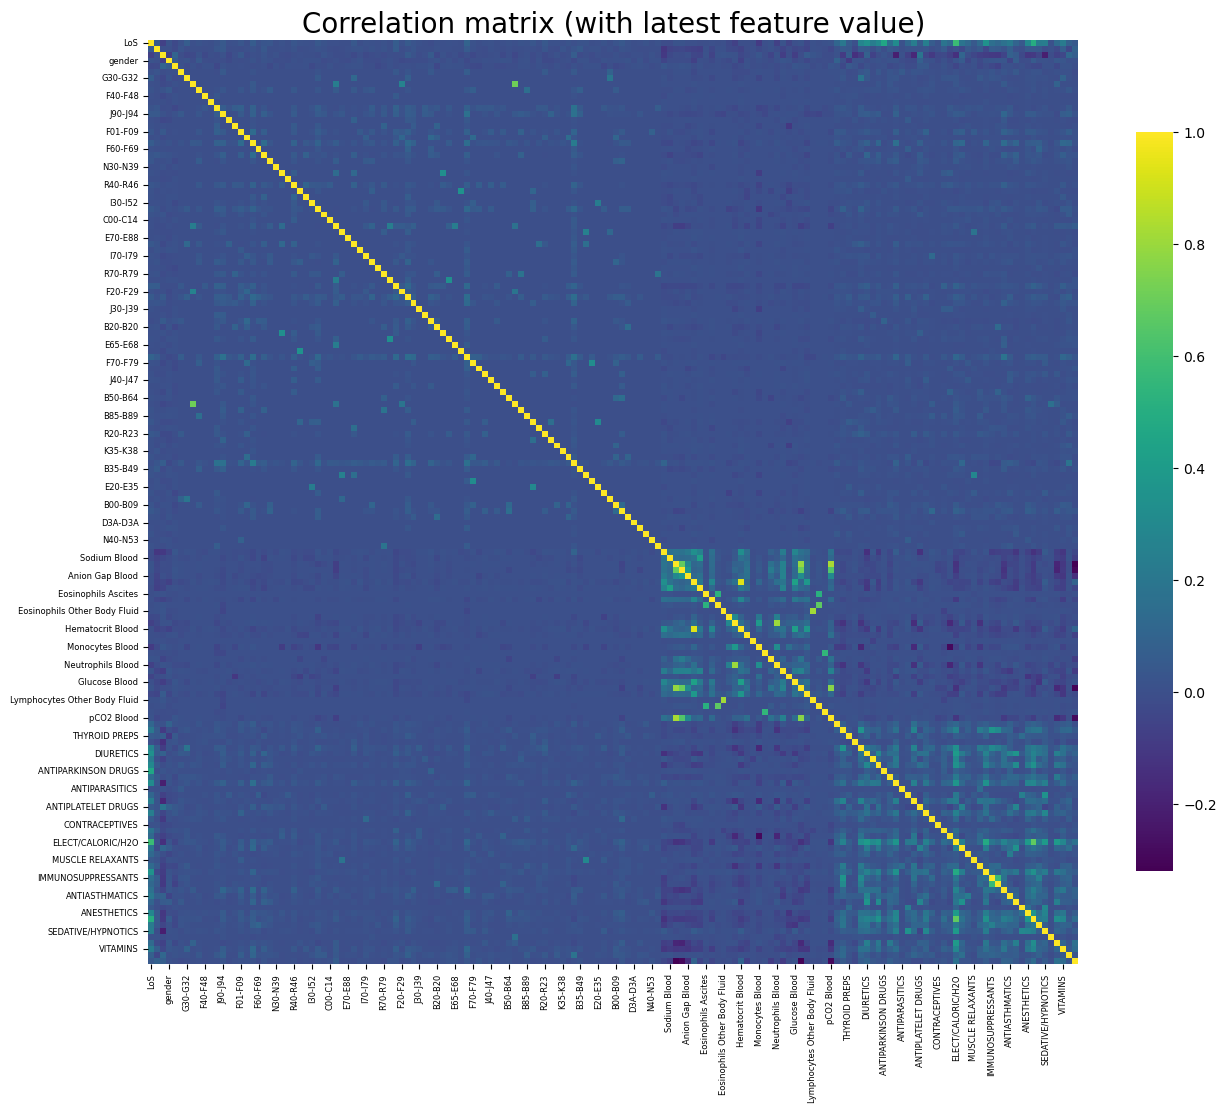

In [4]:
# correlation test (latest feature value)
feat_cols_latest = train_merged_df_latest.columns[9:].to_list()
corr_mat_latest = train_merged_df_latest[feat_cols_latest + ['readmitted_within_30days']].corr()

plt.figure(figsize=(15, 12))
sns.heatmap(corr_mat_latest, annot=False, fmt=".2f", cmap='viridis',  cbar_kws={"shrink": .8})
plt.title("Correlation matrix (with latest feature value)", fontsize=20)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.show()

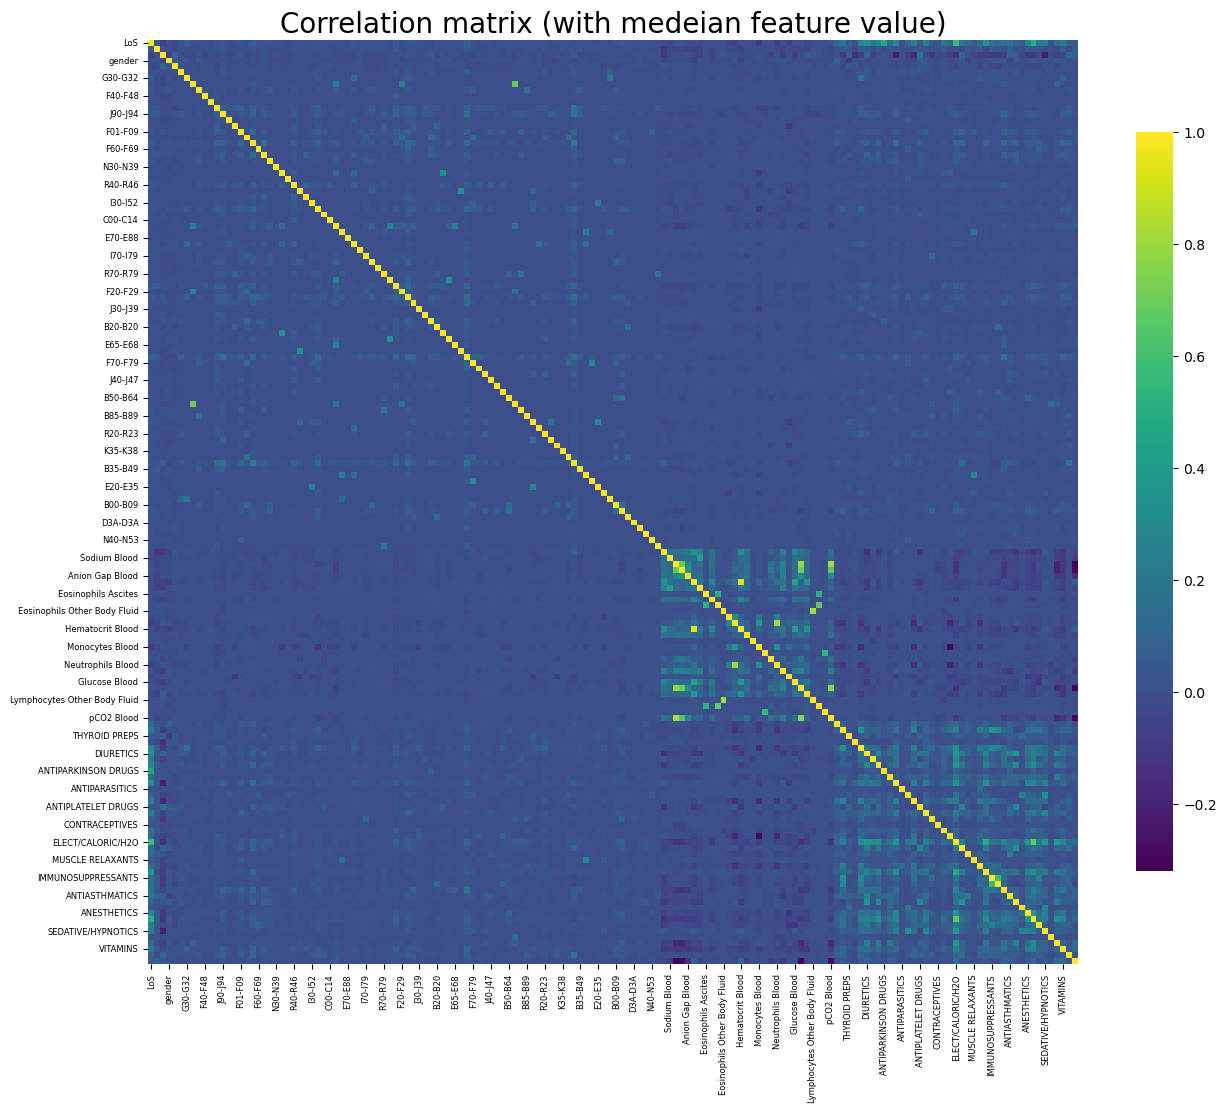

In [5]:
# correlation test (median feature value)
feat_cols_median = train_merged_df_median.columns[9:].to_list()
corr_mat_median = train_merged_df_median[feat_cols_median + ['readmitted_within_30days']].corr()

plt.figure(figsize=(15, 12))
sns.heatmap(corr_mat_latest, annot=False, fmt=".2f", cmap='viridis',  cbar_kws={"shrink": .8})
plt.title("Correlation matrix (with medeian feature value)", fontsize=20)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.show()

In [6]:
# extract categorical features
cat_cols = [EHR['feature_cols'][i] for i in EHR['cat_idxs']]
icd_cols = EHR['icd_cols']

Categorical features:


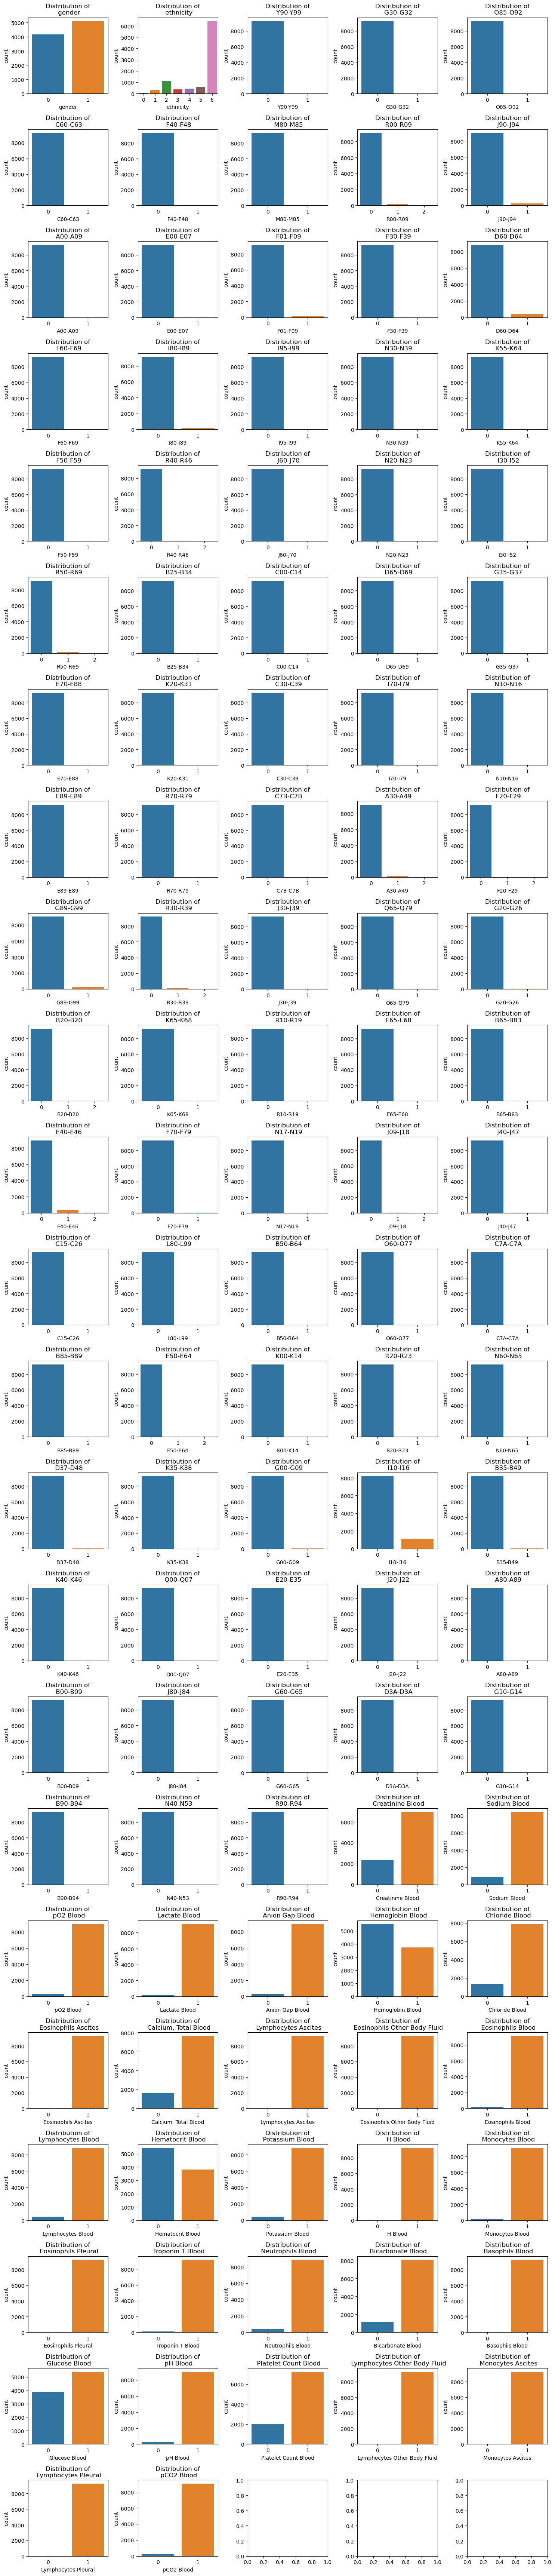

Numerical features:


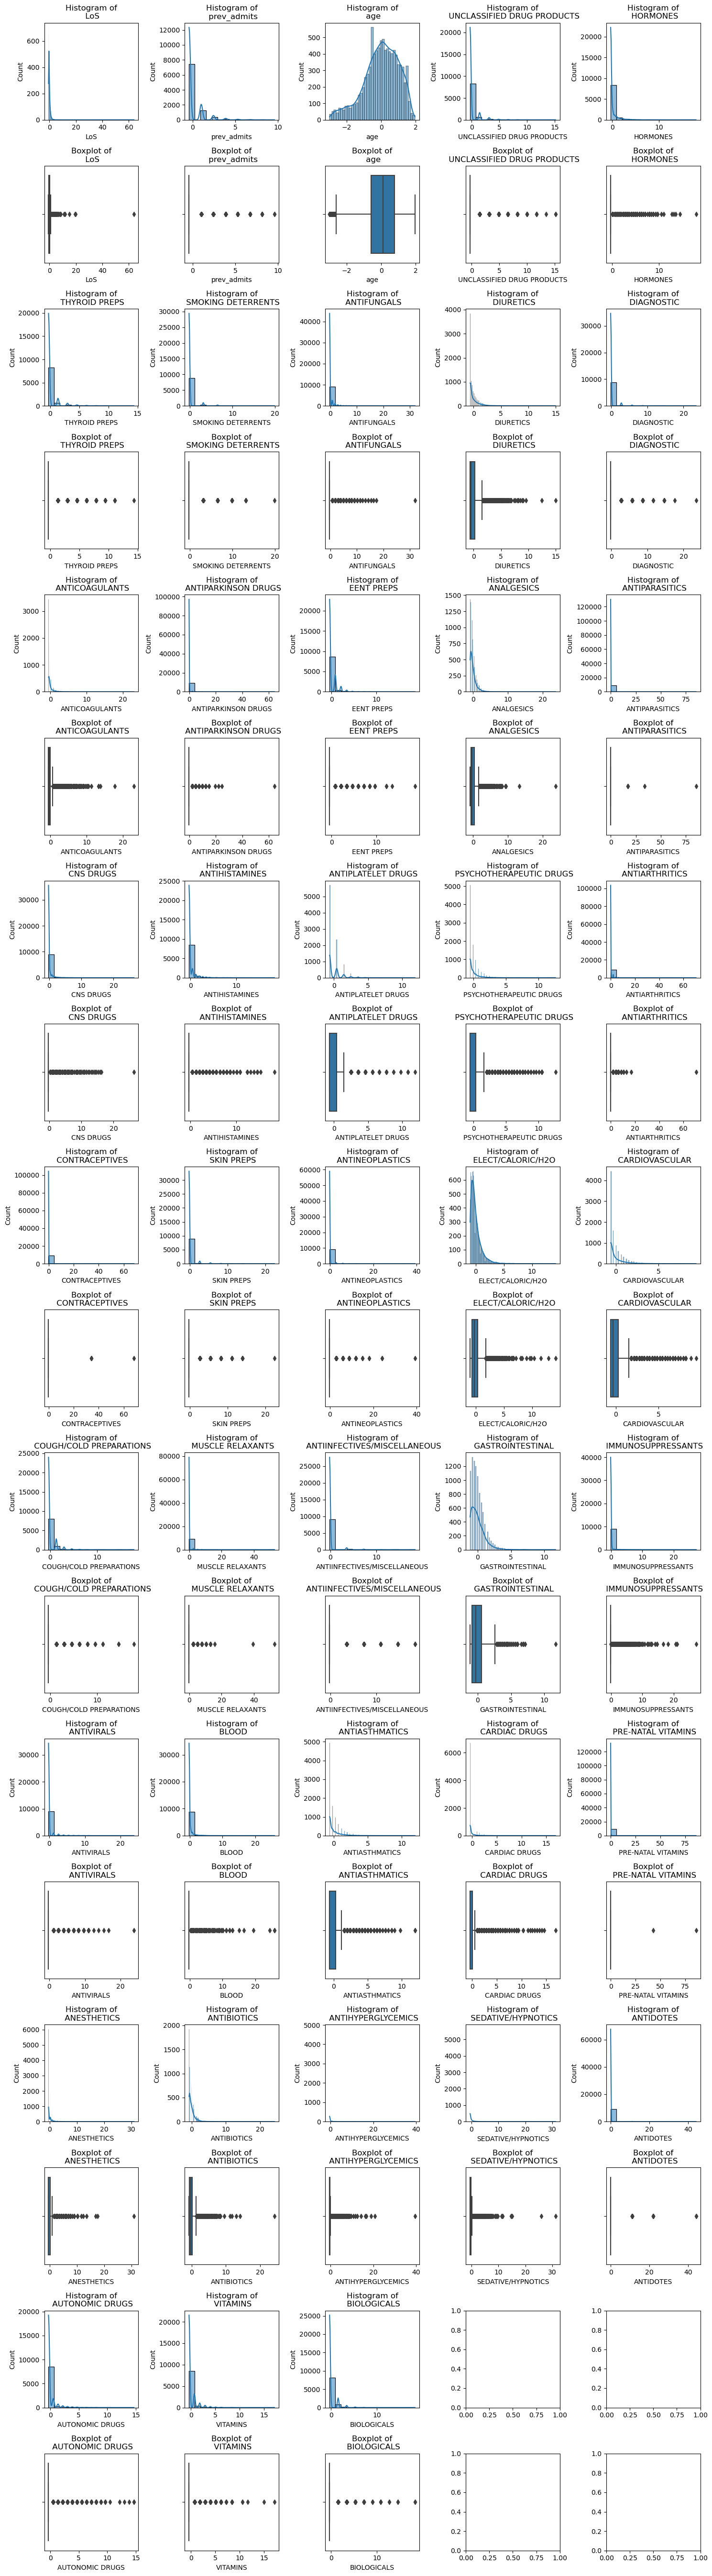

In [7]:
# plot distributions (latest feature value)
cat_cols_latest = [col for col in feat_cols_latest if col in cat_cols or col in icd_cols]
num_cols_latest = [col for col in feat_cols_latest if col not in cat_cols_latest]

# Plot categorical columns
print("Categorical features:")
num_rows = math.ceil(len(cat_cols_latest) / 5)
fig, axs = plt.subplots(num_rows, 5, figsize=(15, num_rows*3))
axs = axs.flatten()
for i, col in enumerate(cat_cols_latest):
    sns.countplot(x=col, data=train_merged_df_latest, ax=axs[i])
    axs[i].set_title(f'Distribution of\n {col}')
plt.tight_layout()
plt.show()

# Plot numerical columns
print("Numerical features:")
num_rows = math.ceil(len(num_cols_latest) / 5) * 2  
fig, axs = plt.subplots(num_rows, 5, figsize=(15, num_rows*3))
axs = axs.flatten()
for i, col in enumerate(num_cols_latest):
    row = (i // 5) * 2  
    sns.histplot(train_merged_df_latest[col], kde=True, ax=axs[row*5 + i%5])  
    sns.boxplot(x=train_merged_df_latest[col], ax=axs[(row+1)*5 + i%5])  
    axs[row*5 + i%5].set_title(f'Histogram of\n {col}')
    axs[(row+1)*5 + i%5].set_title(f'Boxplot of\n {col}')
plt.tight_layout()
plt.show()

Categorical features:


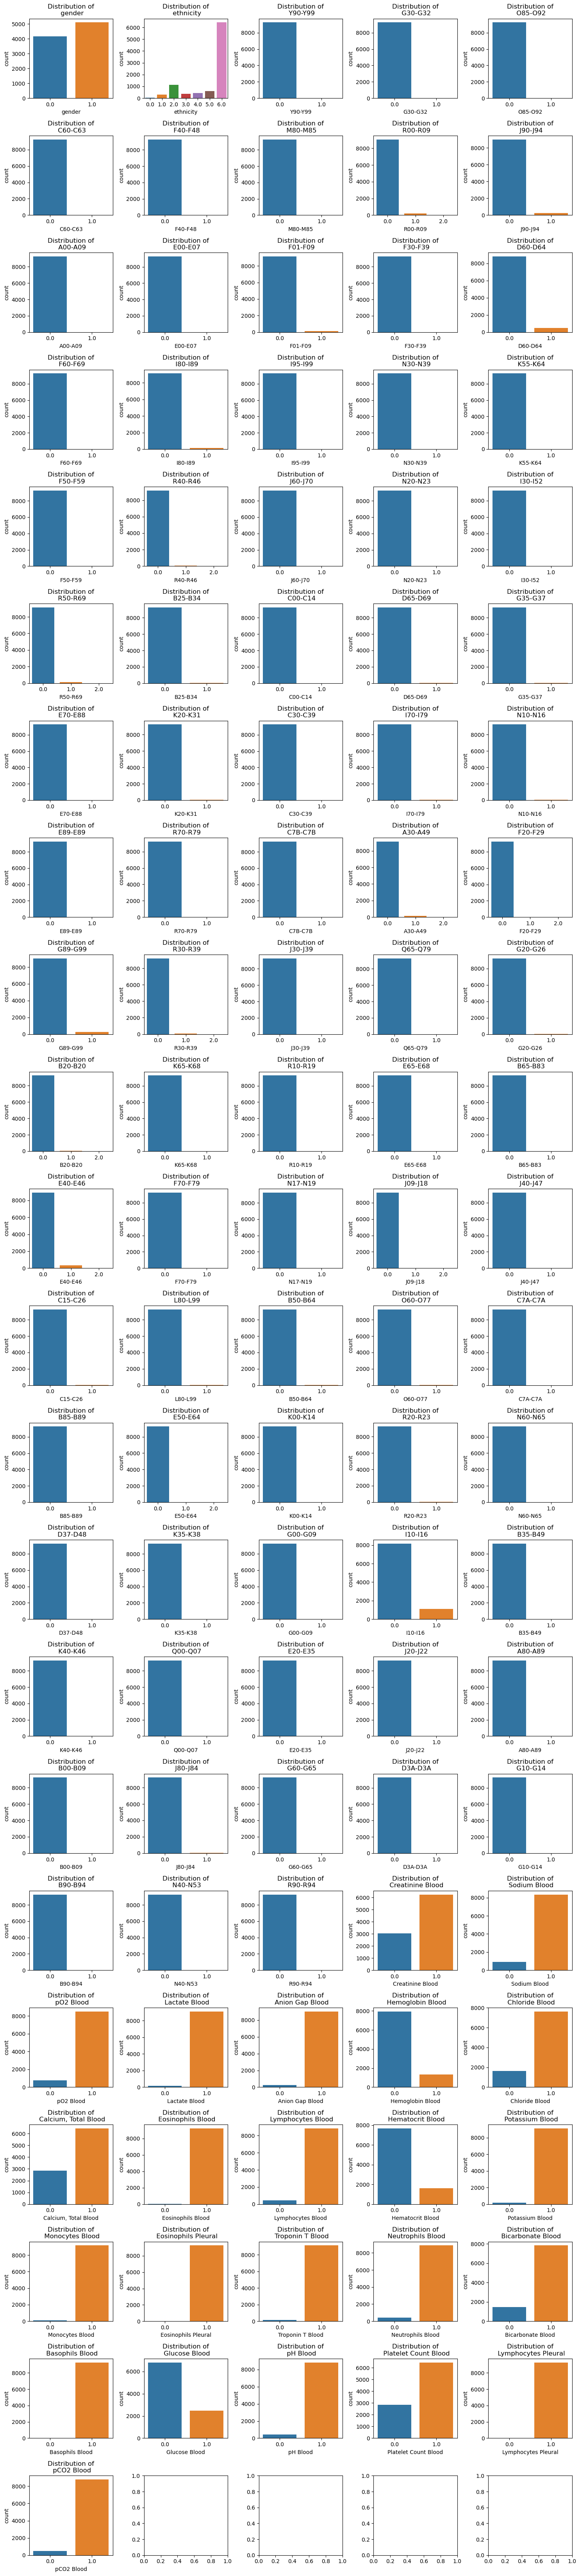

Numerical features:


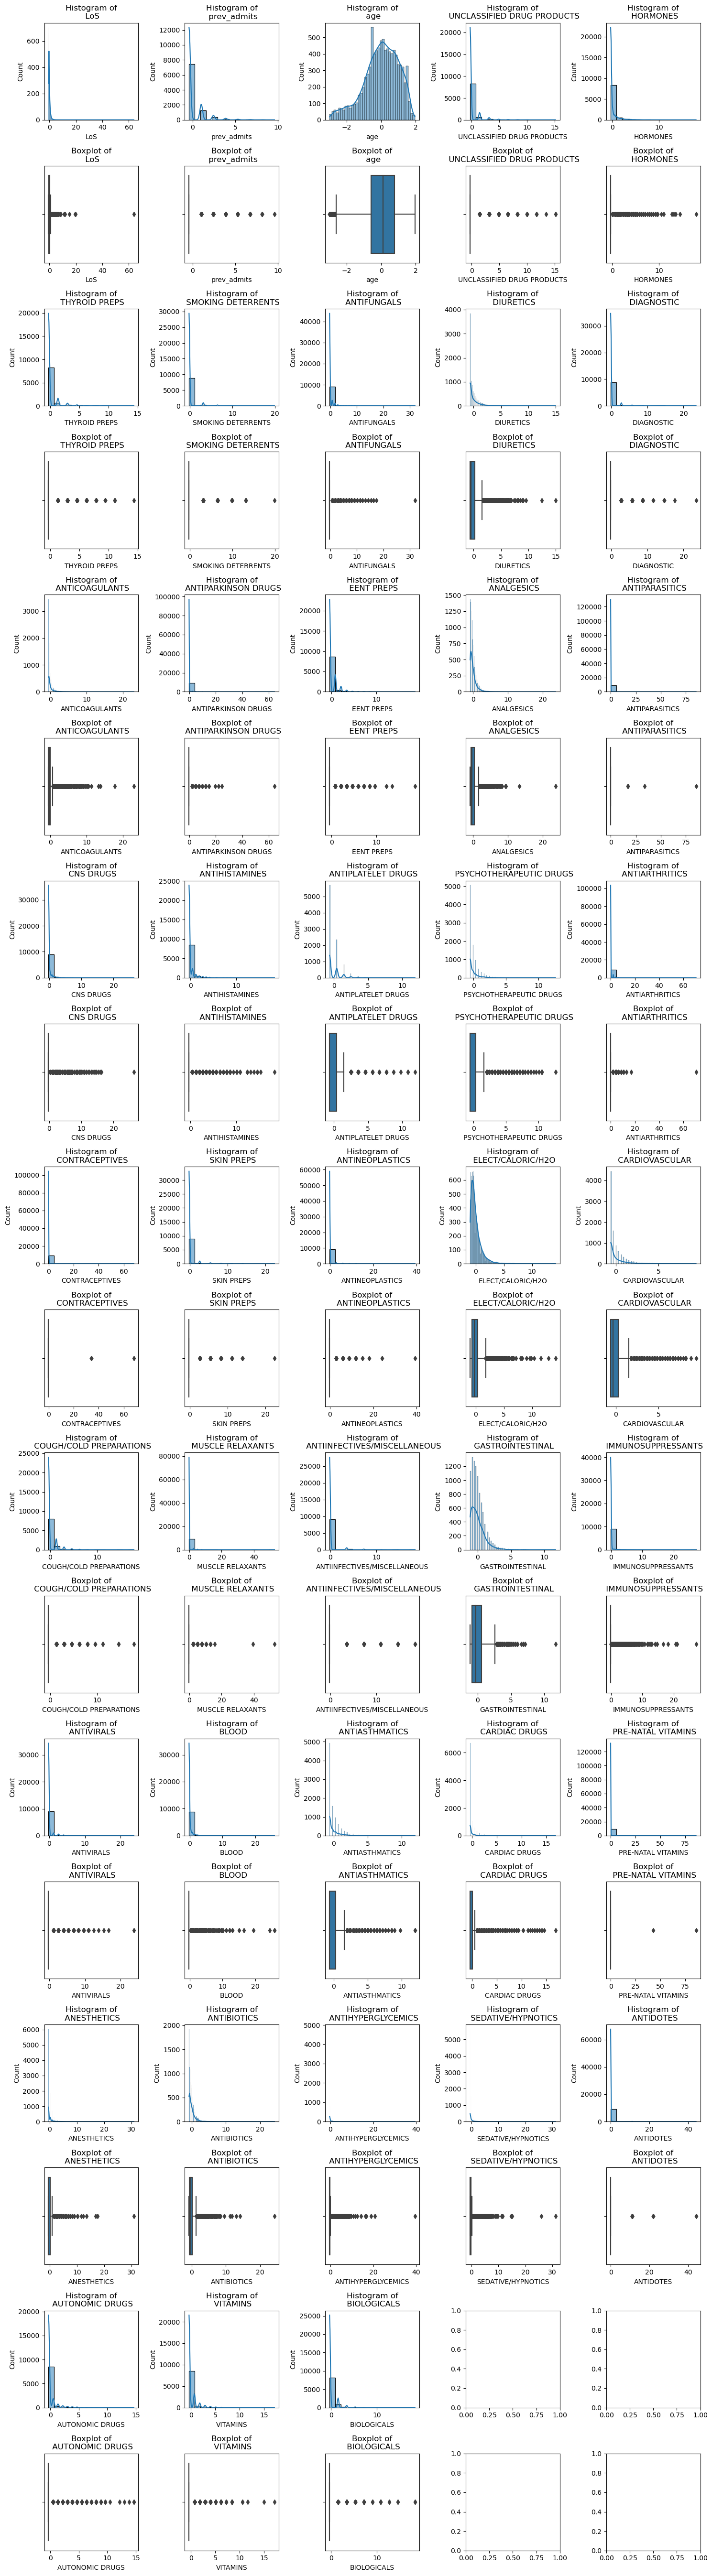

In [8]:
# plot distributions (median feature value)
cat_cols_median = [col for col in feat_cols_median if col in cat_cols or col in icd_cols]
num_cols_median = [col for col in feat_cols_median if col not in cat_cols_median]

# Plot categorical columns
print("Categorical features:")
num_rows = math.ceil(len(cat_cols_median) / 5)
fig, axs = plt.subplots(num_rows, 5, figsize=(15, num_rows*3))
axs = axs.flatten()
for i, col in enumerate(cat_cols_median):
    sns.countplot(x=col, data=train_merged_df_median, ax=axs[i])
    axs[i].set_title(f'Distribution of\n {col}')
plt.tight_layout()
plt.show()

# Plot numerical columns
print("Numerical features:")
num_rows = math.ceil(len(num_cols_median) / 5) * 2  
fig, axs = plt.subplots(num_rows, 5, figsize=(15, num_rows*3))
axs = axs.flatten()
for i, col in enumerate(num_cols_median):
    row = (i // 5) * 2  
    sns.histplot(train_merged_df_median[col], kde=True, ax=axs[row*5 + i%5])  
    sns.boxplot(x=train_merged_df_median[col], ax=axs[(row+1)*5 + i%5])  
    axs[row*5 + i%5].set_title(f'Histogram of\n {col}')
    axs[(row+1)*5 + i%5].set_title(f'Boxplot of\n {col}')
plt.tight_layout()
plt.show()